In [34]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [35]:
#Read images + SHG
CH2 = Image.open('T19-68376 I1 CH2.tif')
CH3 = Image.open('T19-68376 I1 CH3.tif')
SHG = Image.open('T19-68376 I1 SHG.tif')

In [36]:
#Converts images to array
CH2_arr = np.array(CH2)
CH3_arr = np.array(CH3)
SHG_arr = np.array(SHG)

In [37]:
#Normalisation CH2 / conversion to uint8
CH2_norm = ((CH2_arr / CH2_arr.max()) *255)
CH2_normcv = np.uint8(CH2_norm)

#Histogram equalisation of CH2
CH2_eqhist= cv2.equalizeHist(CH2_normcv)

In [38]:
#form a difference image (in int32 form)
diff = np.clip(( (CH3_arr.astype('int32')) - CH2_arr.astype('int32')), 0, CH3_arr.max())

In [39]:
#Normalisation of difference image /  conversion to uint8
diff = ((diff / diff.max()) *255)
diff = np.uint8(diff)

#histogram equalisation of difference image
diff_eqhist = cv2.equalizeHist(diff)

In [40]:
#Normalisation of difference image /  conversion to uint8
SHG = ((SHG_arr / SHG_arr.max()) *255)
SHG = np.uint8(SHG_arr)

#histogram equalisation of difference image
SHG_eqhist = cv2.equalizeHist(SHG)

In [41]:
#Creates an inverse image for proteins
diff_inverse = cv2.bitwise_not(diff_eqhist)

#Creates an inverse image for lipids
CH2_inverse = cv2.bitwise_not(CH2_eqhist)

#Creates an inverse image for collagen
SHG_inverse = cv2.bitwise_not(SHG_eqhist)

In [42]:
#colourmap for CH2
cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["hotpink", "pink","pink", "pink","white"])

#colourmap for CH3
cmap3 = mpl.colors.LinearSegmentedColormap.from_list("", ["indigo","rebeccapurple","purple","mediumorchid","thistle","white","white"]) 

#colourmap for SHG
cmap_orange = mpl.colors.LinearSegmentedColormap.from_list("", ["darkorange","coral","coral","bisque","white","white","white","white"])

In [43]:
#coloured protein signal
diff_coloured = cmap3(diff_inverse)

#coloured lipid signal
CH2_coloured = cmap2(CH2_inverse)

#coloured collagen signal
SHG_coloured = cmap_orange(SHG_inverse)

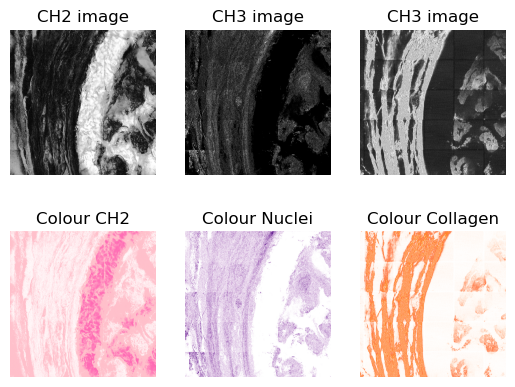

In [44]:
plt.subplot(2,3,1)
plt.imshow(CH2_eqhist,cmap='gray')
plt.axis('off')
plt.title('CH2 image')

plt.subplot(2,3,2)
plt.imshow(diff_eqhist,cmap='gray')
plt.axis('off')
plt.title('CH3 image')

plt.subplot(2,3,3)
plt.imshow(SHG_eqhist,cmap='gray')
plt.axis('off')
plt.title('CH3 image')

plt.subplot(2,3,4)
plt.imshow(CH2_coloured)
plt.axis('off')
plt.title('Colour CH2')

plt.subplot(2,3,5)
plt.imshow(diff_coloured)
plt.axis('off')
plt.title('Colour Nuclei')

plt.subplot(2,3,6)
plt.imshow(SHG_coloured)
plt.axis('off')
plt.title('Colour Collagen')

plt.show()

In [45]:
#Create array for final image
Combined = CH2_coloured.copy()

In [46]:
#Get array size of colour space image (for loops)
X, Y, Z = CH2_coloured.shape

In [50]:
#Loop for combining images

for i in range(X):
    for j in range(Y):
        for k in range(Z):

            #Blending of the two coloured images when: a) there is a protein signal
                                                    #AND b) the CH2 signal is weak

            if ((diff_inverse[i,j]) < 255) and (CH2_inverse[i,j] > 180):
                Combined[i,j,k] = (((diff_coloured[i,j,k]) + CH2_coloured[i,j,k])/2)

              

            #Direct use of protein signal when it is strong  
            if diff_inverse[i,j] < 100:
                Combined[i,j,k] = ( diff_coloured[i,j,k])

           

            #Direct use of Collagen if much stronger than protein sginal
            if (SHG_inverse[i,j] < 60) and (diff_inverse[i,j] > 100):
                Combined[i,j,k] = (SHG_coloured[i,j,k])


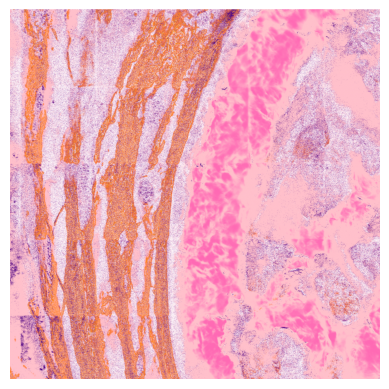

In [51]:
plt.imshow(Combined)
plt.axis('off')
plt.savefig('Final.jpg', bbox_inches='tight')
plt.show()